In [1]:
%matplotlib inline

import matplotlib as mpl
mpl.use('Agg')

from matplotlib.pyplot import imshow

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:1173: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
import os
from PIL import Image
import numpy
import random

image_dir = '/home/sujeetb/geetika/variable_dataset'
import model
files = os.listdir(image_dir)

In [3]:
import model
from model.captcha_cracker import CaptchaCracker

import theano
theano.config.floatX = "float64"

lstm_model_params_prefix = '/home/sujeetb/geetika/dataset/clipping_more_lstm'
cracker = model.captcha_cracker.CaptchaCracker(
    lstm_model_params_prefix, includeCapital=True, multi_chars=True,
    rescale_in_preprocessing=True, num_rnn_steps=8, use_mask_input=True, cnn_dense_layer_sizes = [256],
    lstm_layer_units = 512, bidirec=False
)


/usr/local/lib/python2.7/dist-packages/theano/scan_module/scan.py:1019: Warning: In the strict mode, all neccessary shared variables must be passed as a part of non_sequences
  'must be passed as a part of non_sequences', Warning)
/usr/local/lib/python2.7/dist-packages/theano/scan_module/scan_perform_ext.py:135: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  from scan_perform.scan_perform import *


input:   6 xCWCxC
output:  3 Ili
predicted_char= I
[('I', 0.10085377796720942), ('J', 0.078343452445492012), ('i', 0.058862949338972625), ('u', 0.058768833014988774), ('w', 0.04016468803578755), ('l', 0.037759132301274138), ('t', 0.036409753410840524), ('r', 0.031775837540187854), ('L', 0.027535290063031351), ('d', 0.023535781455020027)]
predicted_char= l
[('l', 0.097457765458898157), ('i', 0.083327596792889883), ('w', 0.079520457465172112), ('V', 0.06937734439733087), ('I', 0.068786799662764089), ('v', 0.060451953652102951), ('r', 0.04108799702993346), ('t', 0.039948224137667063), ('W', 0.039731878869583799), ('u', 0.039673084619986955)]
predicted_char= i
[('i', 0.094800715752474674), ('l', 0.074969361355767331), ('M', 0.068765978330032618), ('I', 0.056507867035717682), ('w', 0.055241650247355681), ('r', 0.049018395961206301), ('u', 0.048281413908239278), ('W', 0.046297513128066889), ('V', 0.04540371348694789), ('v', 0.038733906920942036)]
predicted_char= unk
[('unk', 0.11162746218345

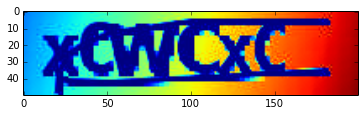

In [26]:
file_path = os.path.join(image_dir, random.choice(files)) 
input = (file_path.rsplit("/", 1)[1].split('_')[1].split(".jpg")[0])
print "input:  ",len(input),input
#Converted image.
imshow(numpy.asarray(Image.open(file_path).convert('L')))
predicted_chars, char_probabilities = cracker.InferFromImagePath(file_path)
output = "".join(x for x in predicted_chars if x != 'unk' ) 
print "output: ", len(output), output 
for i in range(len(predicted_chars)):
    print 'predicted_char= {0}'.format(predicted_chars[i]) 
    print sorted([(char, prob) for char, prob in char_probabilities[i].iteritems()], key=lambda x: x[1], reverse=True)[:10]